<a href="https://colab.research.google.com/github/EnesGokceDS/Amazon_Reviews_NLP_Capstone_Project/blob/master/Amazon_Review_Data_Visulization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import subprocess as sp
import sys,os,shutil,pickle,time
from os.path import join
# mount Google Drive
from os.path import expanduser
gd_path=join(expanduser("~"),'gd')
if not os.path.isdir(gd_path):
    try:
        # load Google Drive
        from google.colab import drive,files
        drive.mount('/drive')
        sp.call('ln -s /drive/My\ Drive '+gd_path, shell=True)
    except:
        print('unable to find Google Drive Folder')
os.chdir(gd_path+'/MachineLearning/NLP_capstone_data')
os.listdir('.')

['Reviews.csv', 'Amazon_reviews_processed.csv']

In [0]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('Amazon_reviews_processed.csv')
df.head(5)

Id   ProductId          UserId  ...  word_count  char_count  avg_word
0   1  B001E4KFG0  A3SGXH7AUHU8GW  ...          23         164       6.2
1   2  B00813GRG4  A1D87F6ZCVE5NK  ...          18         136       6.6
2   3  B000LQOCH0   ABXLMWJIXXAIN  ...          40         285       6.1
3   4  B000UA0QIQ  A395BORC6FGVXV  ...          18         128       6.2
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T  ...          13          83       5.5

[5 rows x 17 columns]

**Cleaning Outliers** 

In [5]:
df.describe().round(0)

Id  HelpfulnessNumerator  ...  char_count  avg_word
count  568411.0              568411.0  ...    568411.0  568411.0
mean   284227.0                   2.0  ...       269.0       6.0
std    164099.0                   8.0  ...       281.0       1.0
min         1.0                   0.0  ...         5.0       0.0
25%    142114.0                   0.0  ...       110.0       5.0
50%    284224.0                   0.0  ...       184.0       6.0
75%    426342.0                   2.0  ...       323.0       6.0
max    568454.0                 866.0  ...     14782.0      10.0

[8 rows x 12 columns]

As we can see from here, there are lots of outliers here. Let's check distribution of each feature and clean outliers.

###Distribution of HelpfulnessNumerator

From the describe, we can see that there is a huge different third quantile value and max value.

In [0]:
import seaborn as sns
sns.set(color_codes=True)

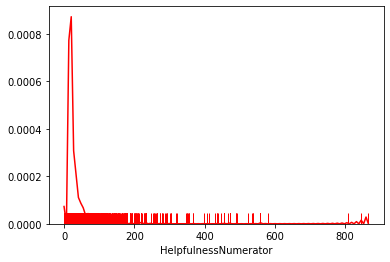

In [9]:
sns.distplot(df.HelpfulnessNumerator, rug=True, hist=False, color = 'red')

The density plot also show that there are outliers values. We need to keep in mind that 3rd quantile value for this feature is 2. In order to avoid outliers, rows that has higher than 10 'HelpfulnessNumerator' value will be dropped.

In [0]:
df = df.loc[df.HelpfulnessNumerator <= 10] 

###Distribution of HelpfulnessDenominator

HelpfulnessDenominator is another feature that has extreme values.

Let's see the distribution of the HelpfulnessDenominator values by using density plot.

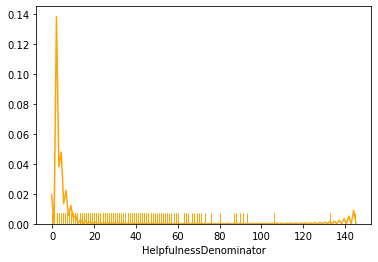

In [11]:
sns.distplot(df.HelpfulnessDenominator, rug=True, hist=False, color = 'orange')

By looking at this plot and considering 3rd quantile value, which is 2, we can choose 10 as cut-off point for HelpfulnessDenominator feature. 

Values bigger than 10 will be dropped.

In [0]:
df= df.loc[df.HelpfulnessDenominator <= 10]

###Distribution of stopwords values


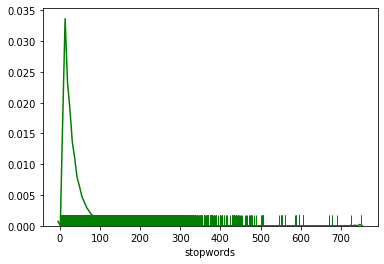

In [13]:
sns.distplot(df.stopwords, rug=True, hist=False, color = 'green')

For stopwords feaure, 40 is the third quantile value. So, 50 must be a good cut-off point for removing outliers. 

In [0]:
df = df.loc[df.stopwords <= 50]

### Distribution of 'punctuation'


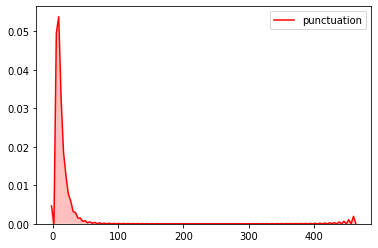

In [15]:
sns.kdeplot(df.punctuation,shade=True, color = 'red')

For punctuation, 3rd quartile value is 20. Therefore, 40 is an acceptable outlier cut-off point for this feature. 

In [0]:
df = df.loc[df.punctuation <= 40]

Let's take a look how the distribution of the punction looks like after dropping outliers:

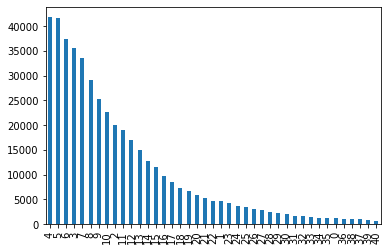

In [17]:
df.punctuation.value_counts().plot(kind= 'bar')

### Distribution of 'hastags' values

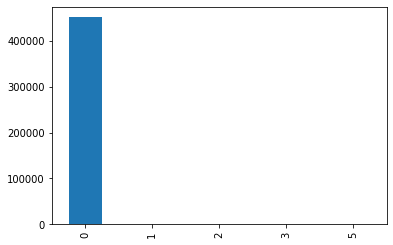

In [18]:
df.hastags.value_counts().plot(kind= 'bar')

As we can see from the bar graph, hastags can be dropped because dominant portion of the reviews have no hastag.

In [0]:
df= df.drop('hastags', axis=1)

Distribution of 'numerics'

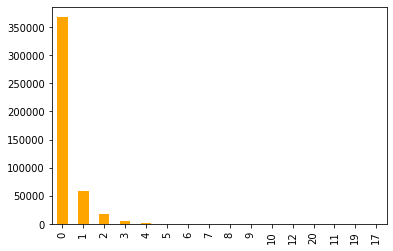

In [20]:
df.numerics.value_counts().plot(kind= 'bar', color= 'orange')

By looking at this plot, we can choose 5 as cut-off point for numerics. 

Rows that has bigger 'numerics' values will be dropped.

In [0]:
df= df.loc[df.numerics <= 5]

### Distribution of 'upper' values

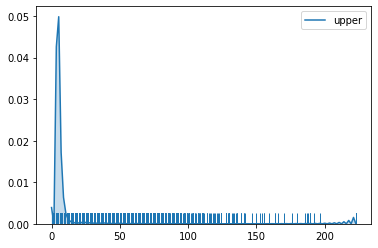

In [22]:
sns.kdeplot(df.upper, shade=True, cut=0)
sns.rugplot(df.upper);

3rd quantile for 'upper' feature was 4. We can safely choose 10 as cut-off point for this feature for getting rid of outliers.

In [0]:
df= df.loc[df.upper <=10]

In [24]:
df.describe()

Id  HelpfulnessNumerator  ...     char_count       avg_word
count  445197.000000         445197.000000  ...  445197.000000  445197.000000
mean   285184.490509              0.945074  ...     174.100910       5.590636
std    164297.972530              1.590928  ...      94.899495       0.543413
min         1.000000              0.000000  ...       7.000000       1.000000
25%    143037.000000              0.000000  ...      99.000000       5.200000
50%    286188.000000              0.000000  ...     151.000000       5.600000
75%    427412.000000              1.000000  ...     231.000000       5.900000
max    568454.000000             10.000000  ...     811.000000       9.900000

[8 rows x 11 columns]

###Distribution of word_count values

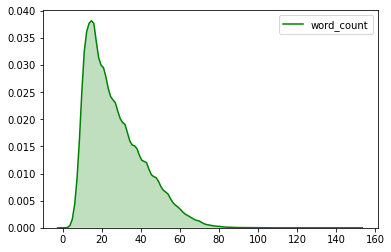

In [25]:
sns.kdeplot(df.word_count,shade=True, color = 'green')

For the word count, 3rd quantile is 45. 100 can be considered as a safe cut-off value for outliers.

In [0]:
df= df.loc[df.word_count <=100]

###Distribution of char_count values

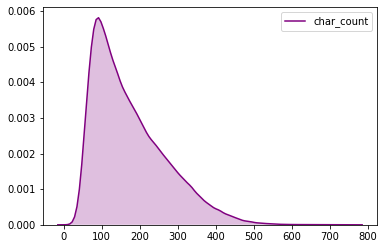

In [27]:
sns.kdeplot(df.char_count,shade=True, color = 'purple')

3rd quantile for char_count is 293. For the outliers cut off point, 600 seems like a safe choice.

In [0]:
df= df.loc[df.char_count <=600]

###Distribution of avg_word length

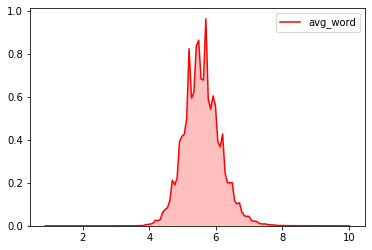

In [29]:
sns.kdeplot(df.avg_word,shade=True, color = 'red')

Now, let's check latest condition of the dataset because we have dropped many values

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445055 entries, 0 to 568410
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      445055 non-null  int64  
 1   ProductId               445055 non-null  object 
 2   UserId                  445055 non-null  object 
 3   HelpfulnessNumerator    445055 non-null  int64  
 4   HelpfulnessDenominator  445055 non-null  int64  
 5   Score                   445055 non-null  int64  
 6   Time                    445055 non-null  object 
 7   Summary                 444583 non-null  object 
 8   Text                    445055 non-null  object 
 9   stopwords               445055 non-null  int64  
 10  punctuation             445055 non-null  int64  
 11  numerics                445055 non-null  int64  
 12  upper                   445055 non-null  int64  
 13  word_count              445055 non-null  int64  
 14  char_count          

It looks number of the rows has become 445055 . It was 568411 before dropping extreme values.


---



---



---



### Distribution of Scores

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

Text(0.5, 1.0, 'Distribution of Scores')

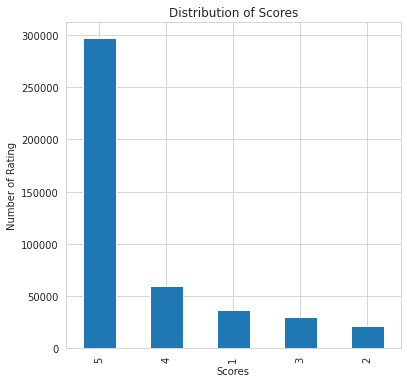

In [32]:
df.Score.value_counts(ascending = False).plot(kind= 'bar', figsize= (6,6))
plt.xlabel("Scores")
plt.ylabel('Number of Rating')
plt.title('Distribution of Scores')

Let's create the same graph in a more colorful way

Text(0.5, 1.0, 'Distribution of Scores')

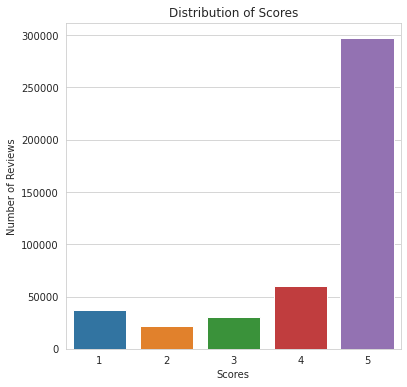

In [33]:
a = df.groupby(['Score'])['Id'].count()
a = a.reset_index()
a = a.rename(columns={'Id': 'Number of Reviews'})
fig, ax = plt.subplots(figsize=(6, 6))

sns.barplot(x='Score', y='Number of Reviews', data=a)
plt.xlabel("Scores")
plt.ylabel('Number of Reviews')
plt.title('Distribution of Scores')

Most of the reviews are 5 stars. This is an unbalanced distribution.


---



---



### Number of Characters in Reviews

In [0]:
import matplotlib.pyplot as plt
import numpy as np
sns.set(color_codes=True)

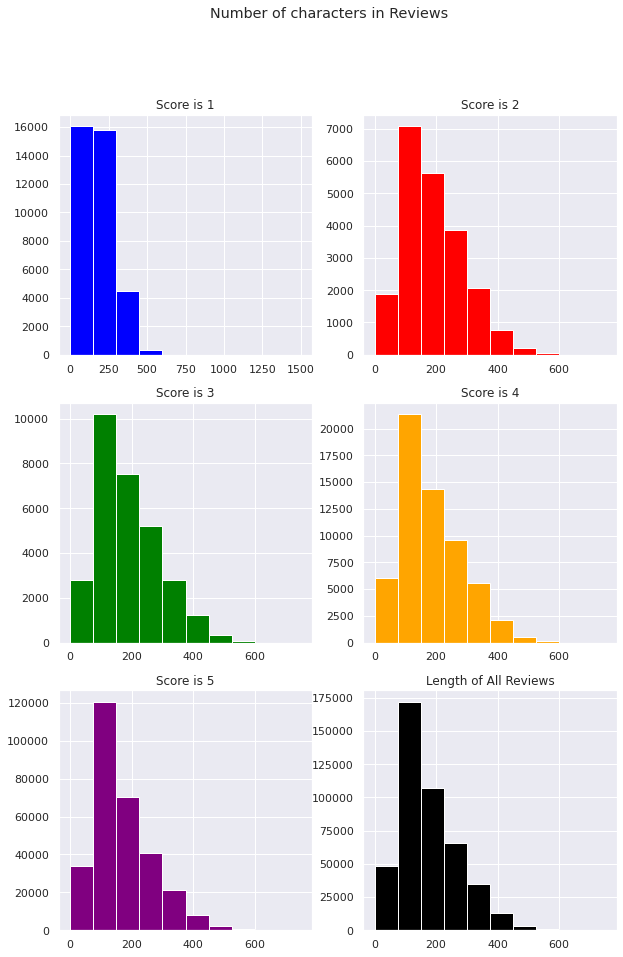

In [40]:
fig, axs = plt.subplots(3,2, figsize=(10, 15))

#Score 1
review_len = df.loc[df['Score']==1]['Text'].str.len()
axs[0,0].hist(review_len, color='blue', range=(0,1500))
axs[0,0].set_title('Score is 1')

#Score 2
review_len = df.loc[df['Score']==2]['Text'].str.len()
axs[0,1].hist(review_len, color='red',range=(0,750))
axs[0,1].set_title('Score is 2')

#Score 3
review_len = df.loc[df['Score']==3]['Text'].str.len()
axs[1,0].hist(review_len, color='green', range=(0,750))
axs[1,0].set_title('Score is 3')

#Score 4
review_len = df.loc[df['Score']==4]['Text'].str.len()
axs[1,1].hist(review_len, color='orange', range=(0,750))
axs[1,1].set_title('Score is 4')


#Score 5
review_len = df.loc[df['Score']==5]['Text'].str.len()
axs[2,0].hist(review_len, color='purple', range=(0,750))
axs[2,0].set_title('Score is 5')

#All Scores
review_len = df['Text'].str.len()
axs[2,1].hist(review_len, color='black', range=(0,750))
axs[2,1].set_title('Length of All Reviews')


fig.suptitle('Number of characters in Reviews')

plt.show()

Distribution of Number of Words for Reviews


In [36]:
list(df)

['Id',
 'ProductId',
 'UserId',
 'HelpfulnessNumerator',
 'HelpfulnessDenominator',
 'Score',
 'Time',
 'Summary',
 'Text',
 'stopwords',
 'punctuation',
 'numerics',
 'upper',
 'word_count',
 'char_count',
 'avg_word']

<Figure size 1200x1000 with 0 Axes>

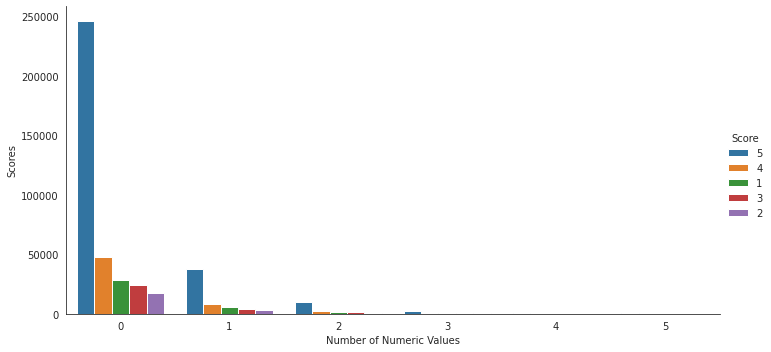

In [37]:
# Now, let's take a look at the Number of Words number for tweets

plt.figure(figsize=(12,10), dpi= 100 )
# sns.set(font_scale=1)

with sns.axes_style('white'):
    g = sns.catplot( 'numerics', data= df, aspect= 2, kind='count', 
                    hue='Score', hue_order=df['Score'].value_counts().sort_values(ascending=False).index)
    g.set_ylabels('Scores')
    g.set_xlabels('Number of Numeric Values')
    g.set_titles('Distrubition of Number of Numeric values for Reviews')



In [38]:
import plotly.express as px
fig = px.histogram(df, x="char_count",color="Score", marginal="rug",
                   title='Distiribtion of number of character',
                   labels={'char_count':'Distiribtion of number of character'})
fig.show()


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445055 entries, 0 to 568410
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      445055 non-null  int64  
 1   ProductId               445055 non-null  object 
 2   UserId                  445055 non-null  object 
 3   HelpfulnessNumerator    445055 non-null  int64  
 4   HelpfulnessDenominator  445055 non-null  int64  
 5   Score                   445055 non-null  int64  
 6   Time                    445055 non-null  object 
 7   Summary                 444583 non-null  object 
 8   Text                    445055 non-null  object 
 9   stopwords               445055 non-null  int64  
 10  punctuation             445055 non-null  int64  
 11  numerics                445055 non-null  int64  
 12  upper                   445055 non-null  int64  
 13  word_count              445055 non-null  int64  
 14  char_count          

In [0]:
df['Time']= pd.to_datetime(df.Time)

In [50]:
df.Time

0        2011-04-27
1        2012-09-07
2        2008-08-18
3        2011-06-13
4        2012-10-21
            ...    
568406   2011-03-09
568407   2012-03-09
568408   2012-02-21
568409   2012-03-13
568410   2012-05-31
Name: Time, Length: 445055, dtype: datetime64[ns]

Text(0.5, 1.0, 'Seasonality Plot for Review Scores')

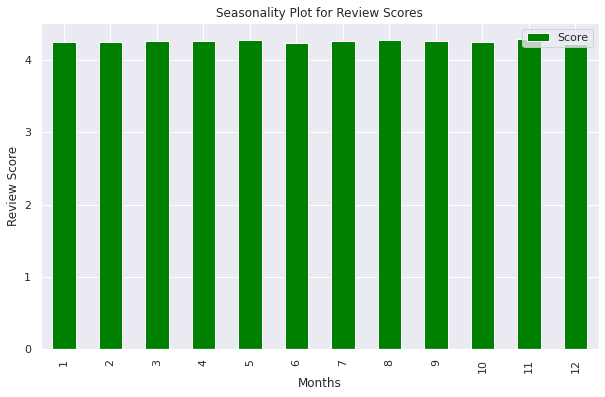

In [58]:
df[['Score']].groupby(df["Time"].dt.month).mean().plot(kind="bar", figsize= (10,6), color ='green')
plt.xlabel('Months')
plt.ylabel('Review Score')
plt.title('Seasonality Plot for Review Scores')

As we can see here, seasonality doesn't have a visible affect on score. All of them over 4 out of 5.

##### Let's check historic distribution of total number of scores

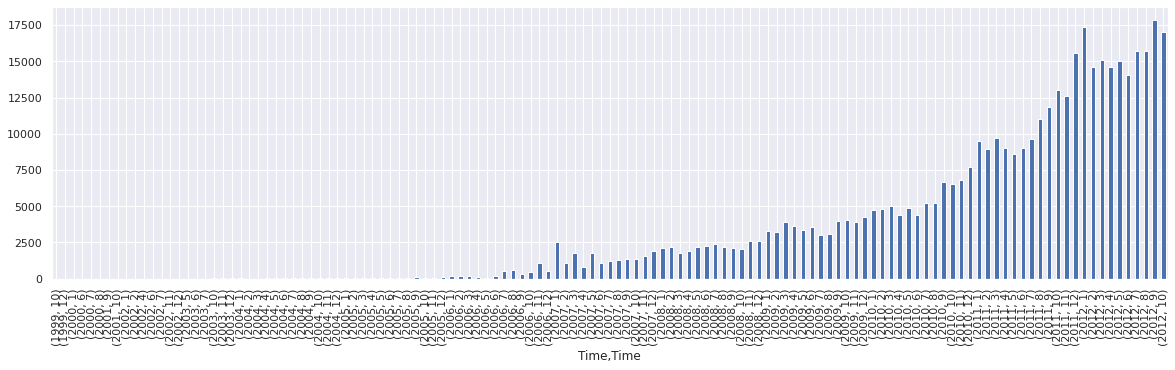

In [59]:
df.Score.groupby([df["Time"].dt.year, df["Time"].dt.month]).count().plot(kind="bar", figsize=(20,5))

Let's create this same plot with different tool

In [62]:
import plotly.graph_objects as go
import datetime

fig = go.Figure(data=[go.Bar(y =df.Score.groupby([df["Time"].dt.year, df["Time"].dt.month]).count())])
fig.update_layout(title_text='Time Series for Total Number of Scores with Rangeslider',
                  xaxis_rangeslider_visible=True)

##### Time Series for Mean Score with Rangeslider

In [61]:
import plotly.graph_objects as go
import datetime

fig = go.Figure(data=[go.Bar(y =df.Score.groupby([df["Time"].dt.year, df["Time"].dt.month]).mean())])
fig.update_layout(title_text='Time Series for Average Score with Rangeslider',
                  xaxis_rangeslider_visible=True)

##### Mean number of the Scores over the time

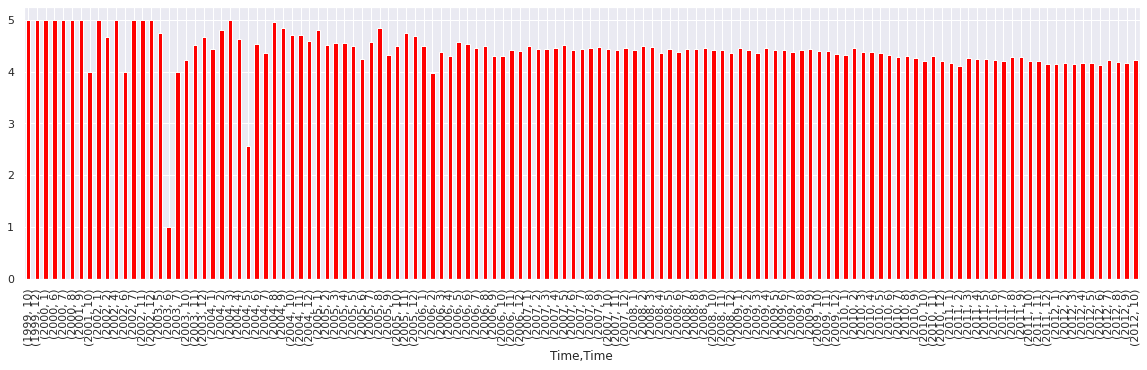

In [65]:
df.Score.groupby([df["Time"].dt.year, df["Time"].dt.month]).mean().plot(kind="bar", figsize=(20,5), color = 'red')

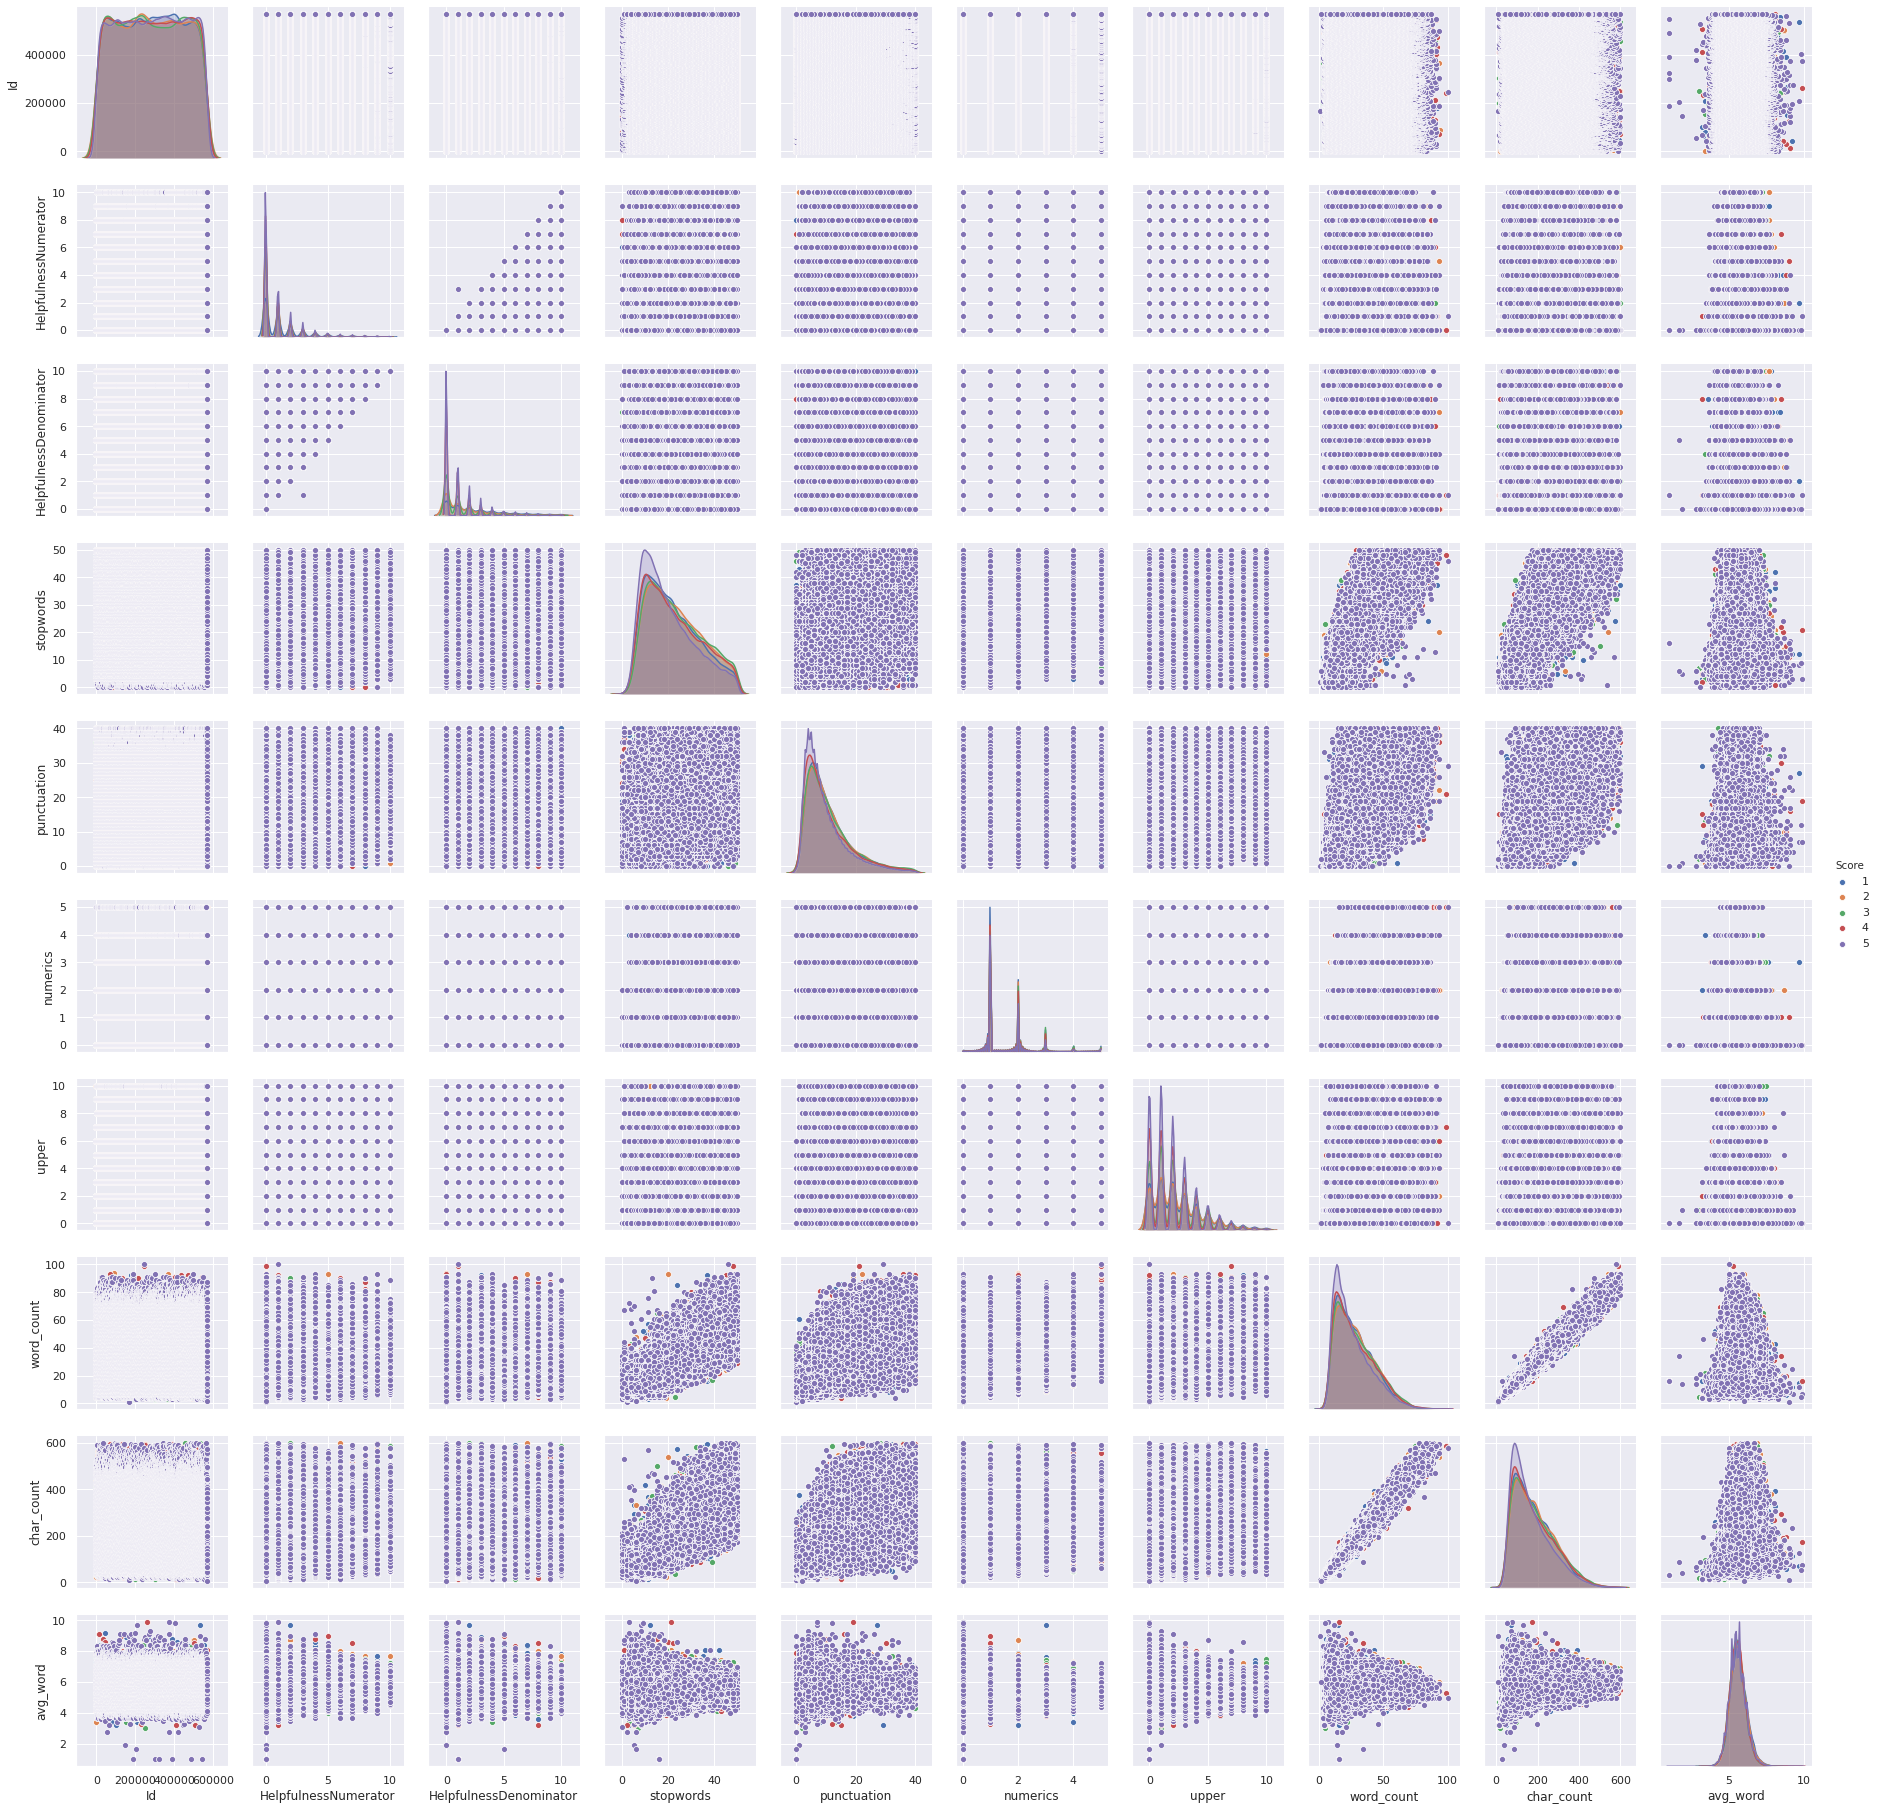

In [66]:
sns.pairplot(df, hue="Score")

In [0]:
df.to_csv('Amazon_reviews_cleaned_finalform.csv', index=False)